# Data check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/kyohei/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv('~/kaggle_data/02digit_recognizer/train.csv')

- targetはlabel
- 特徴量はpixel0〜783
- 特徴量は28×28の784

In [3]:
data.columns

Index([u'label', u'pixel0', u'pixel1', u'pixel2', u'pixel3', u'pixel4',
       u'pixel5', u'pixel6', u'pixel7', u'pixel8',
       ...
       u'pixel774', u'pixel775', u'pixel776', u'pixel777', u'pixel778',
       u'pixel779', u'pixel780', u'pixel781', u'pixel782', u'pixel783'],
      dtype='object', length=785)

- 対象は0〜9の数字

In [4]:
np.sort(data.iloc[:,0].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
grouped = data.groupby(['label'])

In [6]:
non_zero_count = (grouped.mean() != 0).astype(int).sum(axis=1)

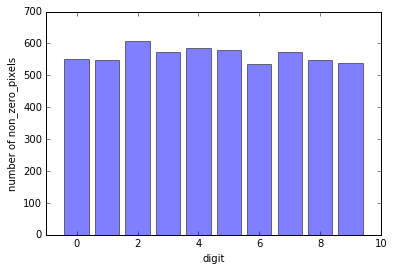

In [7]:
plt.bar(non_zero_count.index,non_zero_count.values,align='center',color='blue',alpha=0.5)
plt.xlabel('digit')
plt.ylabel('number of non_zero_pixels')
plt.xlim((-1,10))
plt.show()

- non zeroのpixelの個数は大差無いですね。

In [8]:
pixels_mean = grouped.mean().mean(axis=1)

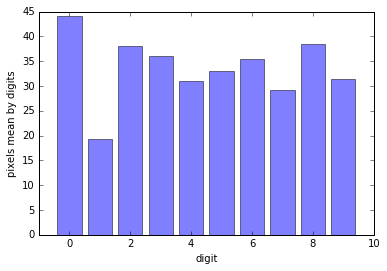

In [9]:
plt.bar(pixels_mean.index,pixels_mean.values,align='center',alpha=0.5)
plt.xlabel('digit')
plt.ylabel('pixels mean by digits')
plt.xlim([-1,10])
plt.show()

- 1だけ値が低い。棒だからね。

In [10]:
grouped.max().max(axis=1)

label
0    255
1    255
2    255
3    255
4    255
5    255
6    255
7    255
8    255
9    255
dtype: int64

- maxの値は数値毎に変わらない。濃さだから当たり前です。 

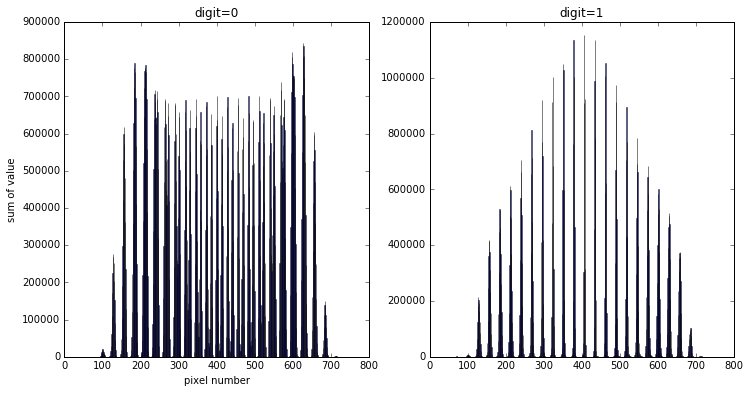

In [11]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].bar(range(data.shape[1]-1),data[data['label']==0].sum()[1:],alpha=0.5)
ax[1].bar(range(data.shape[1]-1),data[data['label']==1].sum()[1:],alpha=0.5)
ax[0].set_xlabel('pixel number')
ax[0].set_ylabel('sum of value')
ax[0].set_title('digit=0')
ax[1].set_title('digit=1')

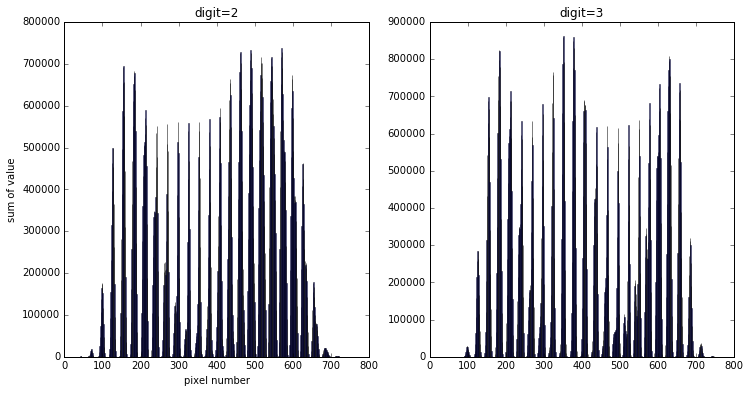

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].bar(range(data.shape[1]-1),data[data['label']==2].sum()[1:],alpha=0.5)
ax[1].bar(range(data.shape[1]-1),data[data['label']==3].sum()[1:],alpha=0.5)
ax[0].set_xlabel('pixel number')
ax[0].set_ylabel('sum of value')
ax[0].set_title('digit=2')
ax[1].set_title('digit=3')

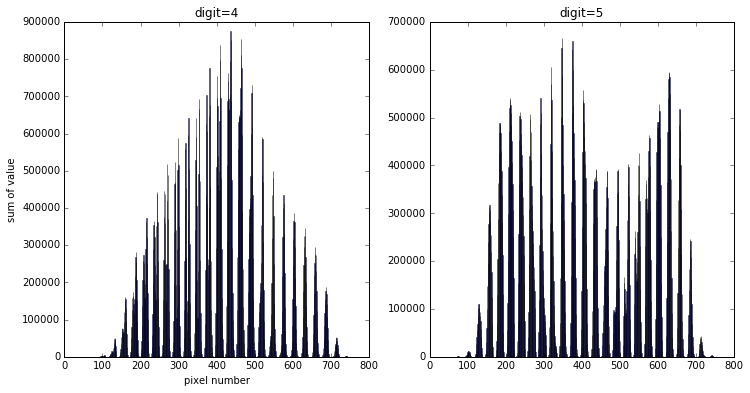

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].bar(range(data.shape[1]-1),data[data['label']==4].sum()[1:],alpha=0.5)
ax[1].bar(range(data.shape[1]-1),data[data['label']==5].sum()[1:],alpha=0.5)
ax[0].set_xlabel('pixel number')
ax[0].set_ylabel('sum of value')
ax[0].set_title('digit=4')
ax[1].set_title('digit=5')

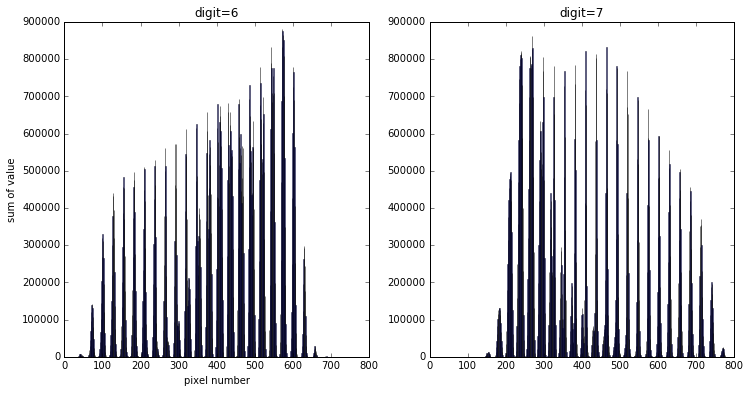

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].bar(range(data.shape[1]-1),data[data['label']==6].sum()[1:],alpha=0.5)
ax[1].bar(range(data.shape[1]-1),data[data['label']==7].sum()[1:],alpha=0.5)
ax[0].set_xlabel('pixel number')
ax[0].set_ylabel('sum of value')
ax[0].set_title('digit=6')
ax[1].set_title('digit=7')

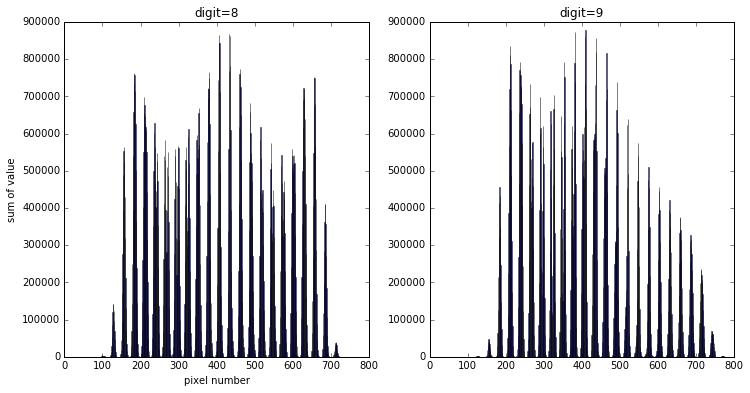

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].bar(range(data.shape[1]-1),data[data['label']==8].sum()[1:],alpha=0.5)
ax[1].bar(range(data.shape[1]-1),data[data['label']==9].sum()[1:],alpha=0.5)
ax[0].set_xlabel('pixel number')
ax[0].set_ylabel('sum of value')
ax[0].set_title('digit=8')
ax[1].set_title('digit=9')

- 7と9の分布が若干似ているかな。その他の数字同士はあまり似ていない。
- 対象な数字は分布も対象だけど、非対称の数字は分布も非対称で少しおもしろい。
- ということで、分類は結構正確にできるのではないかな

# ランダムフォレスト
- kaggleのチュートリでランダムフォレスト使われていたので、ここでもそれに習う。

In [16]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
forest = RandomForestClassifier(random_state=0,n_estimators=10)
forest.fit(X,y)
predict = forest.predict(X)
print('demo accuracy score: %.3f') % accuracy_score(y,predict)

demo accuracy score: 0.999


とりあえず一回出す。過学習であることは承知。max_depthのちょこっとした範囲だけ調整

In [18]:
param_grid = {'max_depth':[3,4,5,6,7]}
forest = RandomForestClassifier(random_state=0,n_estimators=10)
grid_search = GridSearchCV(forest,
                          param_grid=param_grid,
                          cv=10,n_jobs=-1)
grid_search.fit(X,y)
print('best score: %.3f') % grid_search.best_score_
print('best parameters: %.3f') % grid_search.best_params_

best score: 0.874


TypeError: float argument required, not dict

In [20]:
forest = RandomForestClassifier(random_state=0,n_estimators=10,max_depth=7)
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
test = pd.read_csv('~/kaggle_data/02digit_recognizer/test.csv')

In [31]:
X_test = test.values

In [32]:
prediction = forest.predict(X_test)

In [37]:
submission = pd.DataFrame({'ImageId':np.arange(1,test.shape[0]+1,1),
                          'Label':prediction})
submission.to_csv('submission.csv',index=False)

1200人中1095位。笑
次は、ハイパーパラメータの調整を頑張ります。